## Assignment 2 - Customer Segmentation using Clustering

**Agenda**

- Perform exploratory data analysis to understand the customers on various attributes
- Identify if there are any missing value; Perform missing value treatment if required
- Convert all categorical columns to numerical columns using appropriate techniques
- Standardize the columns using Standard Scaler
- Using K-Means algorithm cluster customers in to 4 different groups
- Tag each customer with the cluster number
- Plot number of customers for each cluster
- For each cluster, identify the average values of the input variables and populate them in a table. Using background gradient styling technique to visualize this table

 
 
### Problem Statement : In this assignment, you are going segment/cluster different customers of a book lending store

### Dataset :

- Dataset: book_readers.csv

- Dataset Description: 

- Each row is a customer. For each customer, we have their personal details like age, gender, face, marital status, etc. We have details about their book-reading habits
 

<a href="https://intune.timestsw.com/lms/pluginfile.php/1917/mod_assign/introattachment/0/book_readers_data.csv?forcedownload=1">Download Dataset</a>

In [28]:
# Import all required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import data and read dataset
book_readers = pd.read_csv('C:/Users/ejhajee/Downloads/book_readers_data.csv')
print("Shape of data", book_readers.shape)
print("Data Info", book_readers.info())
book_readers.head()

Shape of data (2832, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


## Data Dictionary
 - Variables - 14
 - Observations - 2832
 
## Integer Variables:
 - Age
 - How many books did you read during last 12months?
 
## Categorical Variables:
 - Sex
 - Race
 - Marital status?
 - Education
 - Employement
 - Incomes
 - Read any printed books during last 12months?
 - Read any audiobooks during last 12months?
 - Read any e-books during last 12months?
 - Last book you read, you…
 - Do you happen to read any daily news or newspapers?
 - Do you happen to read any magazines or journals?
 
 ## NA Values
 - Read any printed books during last 12months?           390
 - Read any audiobooks during last 12months?              390
 - Read any e-books during last 12months?                 390
 - Last book you read, you…                               390

In [30]:
print(book_readers.isna().sum())

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                                0
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
dtype: int64


## Feature Engineering

In [31]:
# 1. Perform exploratory data analysis to understand the book_readers on various attributes
print("Age range of book_readers", book_readers['Age'].min(), "to", book_readers['Age'].max())
print("Mean age of book_readers", book_readers['Age'].mean())
print("Data by marital status", book_readers['Marital status?'].value_counts())

Age range of book_readers 16 to 93
Mean age of book_readers 47.27648305084746
Data by marital status Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: Marital status?, dtype: int64


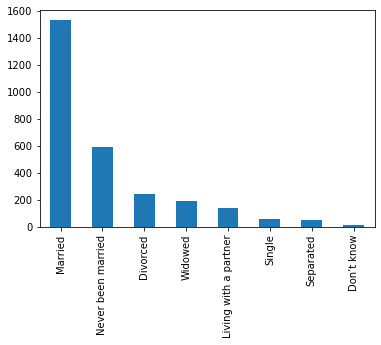

In [32]:
book_readers['Marital status?'].value_counts().plot(kind="bar")

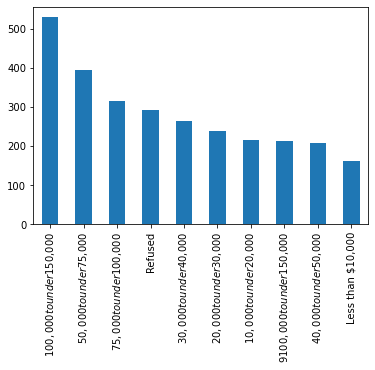

In [33]:
book_readers['Incomes'].value_counts().plot(kind="bar")

In [34]:
# 2. Identify if there are any missing value; Perform missing value treatment if required
print("Data info", book_readers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [35]:
# Above data shows there are missing values under: 
# Read any printed books during last 12months?
# Read any audiobooks during last 12months?
# Read any e-books during last 12months?
# Last book you read, you…

# Fill data with text = "Not Available"
#book_readers.fillna("Not Available", inplace=True)
book_readers.fillna(book_readers.mode(), inplace=True)
book_readers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [36]:
# 3. Convert all categorical columns to numerical columns using appropriate techniques
# Finding all categorical and numerical comumns


# list of all categorical columns

cat_columns = [x for x in book_readers.columns if x not in ['Age', 'How many books did you read during last 12months?']]
cat_columns

# list of all numerical columns

int_columns = ['Age', 'How many books did you read during last 12months?']
int_columns


['Age', 'How many books did you read during last 12months?']

In [37]:
# 3. Convert all categorical columns to numerical columns using appropriate techniques
# Converting below categorical columns using one hot encoding

book_readers['Last book you read, you…'] = pd.get_dummies(book_readers['Last book you read, you…'], drop_first=True)

book_readers['Read any audiobooks during last 12months?'] = pd.get_dummies(book_readers['Read any audiobooks during last 12months?'], drop_first=True)

book_readers['Read any e-books during last 12months?'] = pd.get_dummies(book_readers['Read any e-books during last 12months?'], drop_first=True)

book_readers['Read any printed books during last 12months?'] = pd.get_dummies(book_readers['Read any printed books during last 12months?'], drop_first=True)

In [38]:
# 3. Convert all categorical columns to numerical columns using appropriate techniques
# Converting below categorical columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Sex'])
book_readers['Sex'] = labelEncoder.transform(book_readers['Sex'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Race'])
book_readers['Race'] = labelEncoder.transform(book_readers['Race'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Marital status?'])
book_readers['Marital status?'] = labelEncoder.transform(book_readers['Marital status?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Education'])
book_readers['Education'] = labelEncoder.transform(book_readers['Education'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Employement'])
book_readers['Employement'] = labelEncoder.transform(book_readers['Employement'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Incomes'])
book_readers['Incomes'] = labelEncoder.transform(book_readers['Incomes'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Do you happen to read any daily news or newspapers?'])
book_readers['Do you happen to read any daily news or newspapers?'] = labelEncoder.transform(book_readers['Do you happen to read any daily news or newspapers?'])

labelEncoder = LabelEncoder()
labelEncoder.fit(book_readers['Do you happen to read any magazines or journals?'])
book_readers['Do you happen to read any magazines or journals?'] = labelEncoder.transform(book_readers['Do you happen to read any magazines or journals?'])


In [17]:
book_readers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Age                                                  2832 non-null   int64
 1   Sex                                                  2832 non-null   int64
 2   Race                                                 2832 non-null   int64
 3   Marital status?                                      2832 non-null   int64
 4   Education                                            2832 non-null   int64
 5   Employement                                          2832 non-null   int64
 6   Incomes                                              2832 non-null   int64
 7   How many books did you read during last 12months?    2832 non-null   int64
 8   Read any printed books during last 12months?         2832 non-null   uint8
 9   Read any

In [39]:
# 4. Standardize the numerical columns using Standard Scaler
from sklearn.preprocessing import StandardScaler


In [40]:
book_readers_scaled = book_readers.copy()
# list of all numerical columns

int_columns = ['Age', 'How many books did you read during last 12months?']
int_columns
for col in book_readers[int_columns]:
    scaler = StandardScaler()
    scaler.fit(book_readers[col].values.reshape(-1,1))
    book_readers_scaled[col] = scaler.fit_transform(book_readers[col].values.reshape(-1,1))
    

## Statistical & Mathematical Modelling

In [41]:
# use k-mean algorithm to cluster book readers into 4 groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(book_readers_scaled)
pred= kmeans.predict(book_readers_scaled)

In [42]:
book_readers_group= book_readers.copy()
book_readers_group['cluster'] = pred

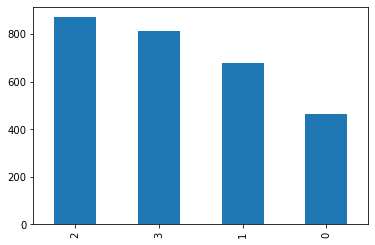

In [43]:
book_readers_group['cluster'].value_counts().plot(kind='bar')

In [44]:
book_readers_group.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?,cluster
0,66,1,6,0,0,6,2,97,0,1,0,0,1,2,2
1,46,1,4,3,2,1,8,97,0,0,0,0,2,2,1
2,32,1,3,4,2,1,8,97,1,0,0,0,2,2,0
3,27,1,3,3,2,1,4,97,0,1,0,0,2,1,0
4,16,0,3,4,3,2,0,97,0,0,1,0,2,1,0


In [45]:
## Do the group by cluster and see the avr values of fields:
book_readers_summary= book_readers_group.groupby('cluster', as_index=True).agg(avg_age=('Age', 'mean'),
                                                                       avg_book_read_last_12mon= ('How many books did you read during last 12months?','mean'),
                                                                       lines_count = ('Age', 'count'))

In [62]:
book_readers_summary

,avg_age,avg_book_read_last_12mon,lines_count
cluster,,,
0,39.991398,11.131183,465
1,51.207048,17.440529,681
2,46.664753,15.695752,871
3,48.802454,20.249080,815


In [47]:
# apply background gradient
book_readers_summary.style.background_gradient()

,avg_age,avg_book_read_last_12mon,lines_count
cluster,,,
0,39.991398,11.131183,465
1,51.207048,17.440529,681
2,46.664753,15.695752,871
3,48.802454,20.249080,815
